# Navigation

---

### Galen Ballew, Fall 2018

In [1]:
from unityagents import UnityEnvironment
from collections import deque
from dqn_agent import Agent
import numpy as np
import random
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#whether or not to skip the training
TRAIN_MODEL=True

# you can enable graphics if you want to see the agent training
env = UnityEnvironment(file_name="/home/master/Git/RL/navigation/Banana_Linux/Banana.x86", no_graphics=True)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

#instantiate agent
agent = Agent(state_size=37, action_size=4, seed=0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
def dqn(n_episodes=1400, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    max_mean = 0                       # keeps track of best checkpoint after solving
    
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
                
        scores_window.append(score)           # save most recent score
        scores.append(score)                  # save most recent score
        eps = max(eps_end, eps_decay*eps)     # decrease epsilon
        window_mean = np.mean(scores_window) # running average of last 100 episodes score
        

        if i_episode % 100 == 0:
            print('\rEpisode {} | Average Score: {:.2f}'.format(i_episode, window_mean))
        if window_mean >= 13.0 and window_mean > max_mean:
            max_mean = window_mean
            print('\rSolved in episode {:d} | Average Score: {:.2f}'.format(i_episode-100, max_mean))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            #break
    return scores

Episode 100 | Average Score: 0.76
Episode 200 | Average Score: 4.53
Episode 300 | Average Score: 7.42
Episode 400 | Average Score: 10.18
Solved in episode 367 | Average Score: 13.00
Solved in episode 370 | Average Score: 13.07
Solved in episode 371 | Average Score: 13.12
Solved in episode 372 | Average Score: 13.27
Solved in episode 374 | Average Score: 13.37
Solved in episode 375 | Average Score: 13.38
Solved in episode 376 | Average Score: 13.40
Solved in episode 379 | Average Score: 13.42
Solved in episode 380 | Average Score: 13.45
Solved in episode 381 | Average Score: 13.57
Solved in episode 384 | Average Score: 13.62
Solved in episode 385 | Average Score: 13.64
Solved in episode 386 | Average Score: 13.69
Solved in episode 390 | Average Score: 13.70
Solved in episode 392 | Average Score: 13.73
Solved in episode 395 | Average Score: 13.78
Solved in episode 399 | Average Score: 13.79
Episode 500 | Average Score: 13.76
Solved in episode 401 | Average Score: 13.86
Solved in episode 

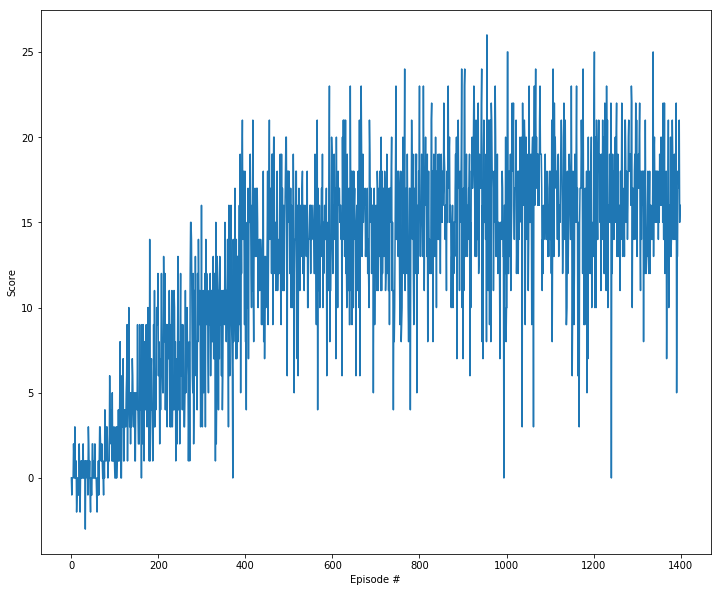

In [4]:
if TRAIN_MODEL:
    scores = dqn()
    
    # plot the scores
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()
    fig.savefig('scores.png', dpi = 300)
    plt.close(fig)

In [5]:
# example episode of final agent
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state, 0.01)                # select an action using final policy
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 16.0


In [6]:
env.close()